#  Aplikasi Nilai Mahasiswa
Mini Project Pemrograman – Python

File Handling, Fungsi, Looping, Percabangan, Lambda, OOP, Exception handling, dan Visualisasi Data.

## Tujuan Program
1. Membaca data nilai mahasiswa dari file CSV
2. Mengolah nilai akhir berdasarkan komponen Tugas, UTS, dan UAS
3. Menentukan grade dan status kelulusan mahasiswa
4. Menampilkan data dalam bentuk tabel terurut (ranking)
5. Menyimpan hasil ke file baru
6. Menampilkan grafik visualisasi distribusi nilai

## Anggota Kelompok 12
1. Habib Hyanggi Pratama (124400076)
2. Nabilla Cindy Aulia (124400012)
3. Vindra Ardi Pratama (124400014)

In [1]:
import csv
import matplotlib.pyplot as plt

In [2]:
class Mahasiswa:
    def __init__(self, nim, nama, tugas, uts, uas):
        self.nim = nim
        self.nama = nama
        self.tugas = float(tugas)
        self.uts = float(uts)
        self.uas = float(uas)

    def nilai_akhir(self):
        return 0.3*self.tugas + 0.3*self.uts + 0.4*self.uas

    def grade(self):
        nilai = self.nilai_akhir()
        if nilai >= 85: return "A"
        elif nilai >= 75: return "B"
        elif nilai >= 65: return "C"
        elif nilai >= 50: return "D"
        else: return "E"

    def status(self):
        return "Lulus" if self.nilai_akhir() >= 65 else "Tidak Lulus"

In [3]:
def load_data(file):
    mahasiswa = []
    try:
        with open(file, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                mahasiswa.append(Mahasiswa(row['NIM'], row['Nama'], row['Tugas'], row['UTS'], row['UAS']))
    except FileNotFoundError:
        print('❌ File tidak ditemukan!')
    return mahasiswa

data = load_data('nilai_mahasiswa.csv')

In [4]:
data_sorted = sorted(data, key=lambda x: x.nilai_akhir(), reverse=True)
for i, mhs in enumerate(data_sorted, start=1):
    print(f"{i}. {mhs.nama} | Nilai: {mhs.nilai_akhir():.2f} | Grade: {mhs.grade()} | {mhs.status()}")

1. Cici | Nilai: 90.70 | Grade: A | Lulus
2. Eka | Nilai: 87.90 | Grade: A | Lulus
3. Andi | Nilai: 80.50 | Grade: B | Lulus
4. Dewi | Nilai: 69.30 | Grade: C | Lulus
5. Budi | Nilai: 62.50 | Grade: D | Tidak Lulus


In [5]:
with open('hasil_nilai.txt', 'w') as f:
    for i, mhs in enumerate(data_sorted, start=1):
        f.write(f"{i}. {mhs.nama} - {mhs.nilai_akhir():.2f} - {mhs.grade()} - {mhs.status()}\n")
print('📁 File berhasil diexport ke hasil_nilai.txt')

📁 File berhasil diexport ke hasil_nilai.txt


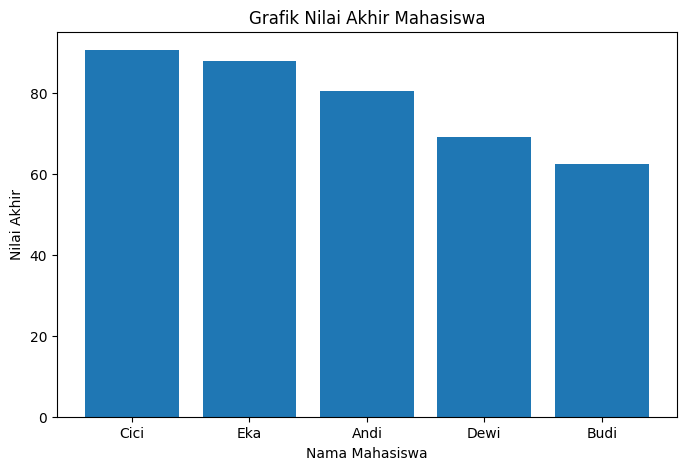

In [6]:
nilai = [m.nilai_akhir() for m in data_sorted]
nama = [m.nama for m in data_sorted]
plt.figure(figsize=(8,5))
plt.bar(nama, nilai)
plt.title('Grafik Nilai Akhir Mahasiswa')
plt.xlabel('Nama Mahasiswa')
plt.ylabel('Nilai Akhir')
plt.show()